# House prediction and Regression model


### importing library

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [17]:
house_data = pd.read_csv('kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
subset_house_data = house_data[['id', 'date', 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'yr_built']]
subset_house_data                                  

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,5650,1.0,0,1955
1,6414100192,20141209T000000,538000.0,3,2.25,7242,2.0,0,1951
2,5631500400,20150225T000000,180000.0,2,1.00,10000,1.0,0,1933
3,2487200875,20141209T000000,604000.0,4,3.00,5000,1.0,0,1965
4,1954400510,20150218T000000,510000.0,3,2.00,8080,1.0,0,1987
...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1131,3.0,0,2009
21609,6600060120,20150223T000000,400000.0,4,2.50,5813,2.0,0,2014
21610,1523300141,20140623T000000,402101.0,2,0.75,1350,2.0,0,2009
21611,291310100,20150116T000000,400000.0,3,2.50,2388,2.0,0,2004


### checking null values

In [22]:
subset_house_data.isna().sum()

id            0
date          0
price         0
bedrooms      0
bathrooms     0
sqft_lot      0
floors        0
waterfront    0
yr_built      0
dtype: int64

In [23]:
subset_house_data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

### Finding outliers

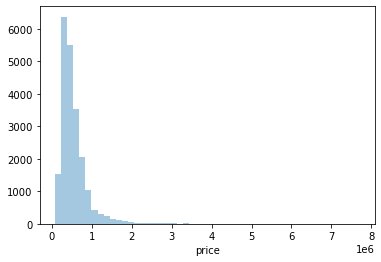

In [27]:
sns.distplot(subset_house_data['price'], kde=False)

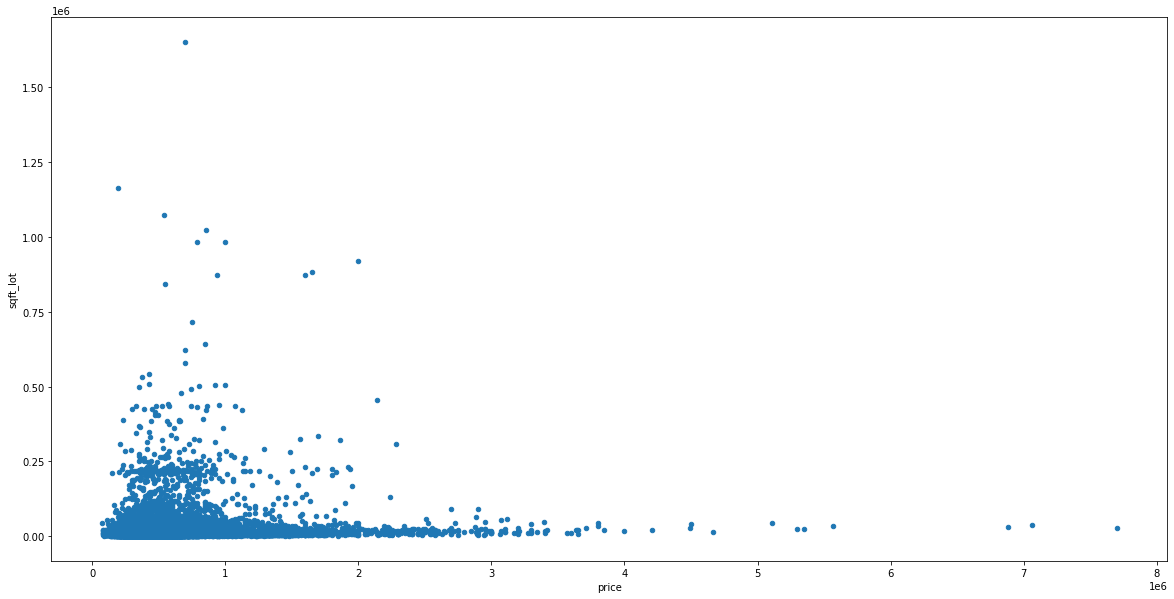

In [33]:
subset_house_data[['price','sqft_lot']].plot(kind = 'scatter', x ='price', y= 'sqft_lot', figsize =(20,10))

In [28]:
subset_house_data['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

In [30]:
subset_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,yr_built
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,1.510697e+04,1.494309,0.007542,1971.005136
std,2.876566e+09,3.671272e+05,0.930062,0.770163,4.142051e+04,0.539989,0.086517,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,1900.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,0.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,1.068800e+04,2.000000,0.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,2015.000000


### Removing outliers

In [36]:
q_75,q_25 = np.percentile(subset_house_data.loc[:,'price'],[75,25])
intr_qr = q_75-q_25
max = q_75+(1.5*intr_qr)
min = q_25-(1.5*intr_qr)
print(max)
print(min)

1129575.0
-162625.0


In [37]:
subset_house_data.loc[subset_house_data['price'] < min,'price'] = np.nan
subset_house_data.loc[subset_house_data['price'] > max,'price'] = np.nan

C:\Users\FCC\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
subset_house_data.isna().sum()

id               0
date             0
price         1146
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
yr_built         0
dtype: int64

In [41]:
subset_house_data = subset_house_data.dropna()

In [42]:
subset_house_data.isna().sum()

id            0
date          0
price         0
bedrooms      0
bathrooms     0
sqft_lot      0
floors        0
waterfront    0
yr_built      0
dtype: int64

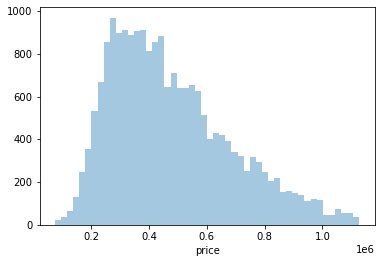

In [43]:
sns.distplot(subset_house_data['price'], kde=False)

### Regression Analysis

In [103]:
y = subset_house_data['price']
x1 = subset_house_data[['bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'yr_built']]

In [104]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:36:08   Log-Likelihood:            -2.7625e+05
No. Observations:               20467   AIC:                         5.525e+05
Df Residuals:                   20460   BIC:                         5.526e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.398e+06   1.03e+05     42.601      0.000     4.2e+06     4.6e+06
bedrooms    1.705e+04   1573.298     10.835      0.000     1.4e+04    2.01e+04
bathrooms   1.452e+05   2489.891     58.300      0.000     1.4e+05     1.5e+05
sqft_lot       0.3916      0.031     12.705      0.000       0.331       0.452
floors      6.776e+04   2819.561     24.033      0.000    6.22e+04    7.33e+04
waterfront    1.6e+05   2.26e+04      7.071      0.000    1.16e+05    2.04e+05
yr_built   -2223.4366     53.688    -41.414      0.000   -2328.670   -2118.203
==============================================================================
Omnibus:                     1087.490   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1272.619
Skew:                           0.586   Prob(JB):                    4.51e-277
Kurtosis:                       3.347   Cond. No.                     3.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

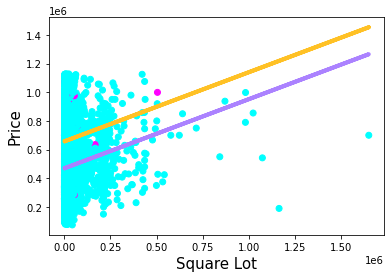

In [105]:
plt.scatter(subset_house_data['sqft_lot'],y ,c =subset_house_data['waterfront'], cmap='cool' )
y_hat_1 = 469400 + subset_house_data['sqft_lot']*0.4818
y_hat_2 = 657300 + subset_house_data['sqft_lot']*0.4818
plt.xlabel("Square Lot", size = 15)
plt.ylabel("Price", size = 15)
plt.plot(subset_house_data['sqft_lot'],y_hat_1 , lw=4 ,c='#AB82FF')
plt.plot(subset_house_data['sqft_lot'],y_hat_2, lw=4, c='#FFC125')

In [86]:
#purple line representing waterfront houses
#yellow line representing no waterfront houses
#blue dot are not waterfront houses
#purple dot are waterfront houses

### Prediction

In [99]:
house_pre = pd.DataFrame({'const': 1, 'waterfront':[0,1], 'sqft_lot':[5000,5000]})
house_pre

,const,waterfront,sqft_lot
0,1,0,5000
1,1,1,5000


In [100]:
prediction = result.predict(house_pre)
prediction

0    471794.776387
1    659674.549331
dtype: float64

In [101]:
predict_df = pd.DataFrame({'Prediction': prediction})
predict_df

,Prediction
0,471794.776387
1,659674.549331


In [102]:
house_pre = house_pre.join(predict_df)
house_pre

,const,waterfront,sqft_lot,Prediction
0,1,0,5000,471794.776387
1,1,1,5000,659674.549331
